<a href="https://colab.research.google.com/github/lotrmay/TensorFlow_Learning/blob/master/bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras


(18775, 102)
(15958, 98)
(11169, 98)
(2394, 98)
(2395, 98)
Epoch 1/2000
88/88 [==============================] - 1s 4ms/step - loss: 1.0023 - binary_accuracy: 0.5198 - val_loss: 0.7359 - val_binary_accuracy: 0.5453
Epoch 2/2000
88/88 [==============================] - 0s 2ms/step - loss: 0.9817 - binary_accuracy: 0.5243 - val_loss: 0.7222 - val_binary_accuracy: 0.5461
Epoch 3/2000
88/88 [==============================] - 0s 2ms/step - loss: 0.9638 - binary_accuracy: 0.5195 - val_loss: 0.7120 - val_binary_accuracy: 0.5407
Epoch 4/2000
88/88 [==============================] - 0s 2ms/step - loss: 0.9435 - binary_accuracy: 0.5215 - val_loss: 0.7035 - val_binary_accuracy: 0.5436
Epoch 5/2000
88/88 [==============================] - 0s 2ms/step - loss: 0.9198 - binary_accuracy: 0.5334 - val_loss: 0.6967 - val_binary_accuracy: 0.5503
Epoch 6/2000
88/88 [==============================] - 0s 2ms/step - loss: 0.9304 - binary_accuracy: 0.5250 - val_loss: 0.6909 - val_binary_accuracy: 0.5553
Epoch

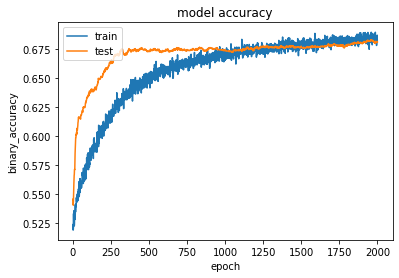

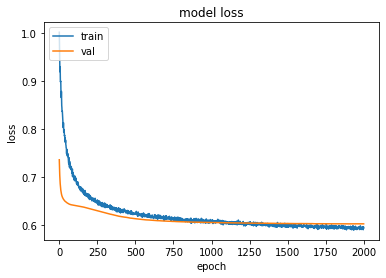

In [55]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras


#CSV_COLUMN_NAMES označuje nadpisy sloupců v csv soubour
CSV_COLUMN_NAMES=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','Match_link','Result','team_one_name','team_two_name']
CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg']



train=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)#vytvoří dataframe z našeho csv souboru
print(train.shape)#vypíše nám dimenzionalitu našeho dataframu (2, 3) 2 řádky 3 sloupce

#následující 2 řádky nám upraví dva sloupce z textových na číselné formáty (category datatype)
train['team_one_name']=pd.Categorical(train['team_one_name']).codes #sníží využití paměti z 1.2MB na 0.03 MB viz: https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a
train['team_two_name']=pd.Categorical(train['team_two_name']).codes

#Odstraním z dataframu následující sloupce (odkaz na zápas a jména týmů), jelikož jsem je využíval pouze při sběru dat
train.pop('Match_link')
train.pop('team_one_name')
train.pop('team_two_name')
#https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
train = train.sample(frac=1).reset_index(drop=True)

'''
train.pop('playerAAGrenadeDmg')
train.pop('playerABGrenadeDmg')
train.pop('playerACGrenadeDmg')
train.pop('playerADGrenadeDmg')
train.pop('playerAEGrenadeDmg')
train.pop('playerBAGrenadeDmg')
train.pop('playerBBGrenadeDmg')
train.pop('playerBCGrenadeDmg')
train.pop('playerBDGrenadeDmg')
train.pop('playerBEGrenadeDmg')

train.pop('playerAAKast')
train.pop('playerABKast')
train.pop('playerACKast')
train.pop('playerADKast')
train.pop('playerAEKast')
train.pop('playerBAKast')
train.pop('playerBBKast')
train.pop('playerBCKast')
train.pop('playerBDKast')
train.pop('playerBEKast')

train.pop('playerAAKD')
train.pop('playerABKD')
train.pop('playerACKD')
train.pop('playerADKD')
train.pop('playerAEKD')
train.pop('playerBAKD')
train.pop('playerBBKD')
train.pop('playerBCKD')
train.pop('playerBDKD')
train.pop('playerBEKD')

train.pop('playerAAAdr')
train.pop('playerABAdr')
train.pop('playerACAdr')
train.pop('playerADAdr')
train.pop('playerAEAdr')
train.pop('playerBAAdr')
train.pop('playerBBAdr')
train.pop('playerBCAdr')
train.pop('playerBDAdr')
train.pop('playerBEAdr')

train.pop('playerAADpr')
train.pop('playerABDpr')
train.pop('playerACDpr')
train.pop('playerADDpr')
train.pop('playerAEDpr')
train.pop('playerBADpr')
train.pop('playerBBDpr')
train.pop('playerBCDpr')
train.pop('playerBDDpr')
train.pop('playerBEDpr')

train.pop('playerAAKpr')
train.pop('playerABKpr')
train.pop('playerACKpr')
train.pop('playerADKpr')
train.pop('playerAEKpr')
train.pop('playerBAKpr')
train.pop('playerBBKpr')
train.pop('playerBCKpr')
train.pop('playerBDKpr')
train.pop('playerBEKpr')

train.pop('playerAAImpact')
train.pop('playerABImpact')
train.pop('playerACImpact')
train.pop('playerADImpact')
train.pop('playerAEImpact')
train.pop('playerBAImpact')
train.pop('playerBBImpact')
train.pop('playerBCImpact')
train.pop('playerBDImpact')
train.pop('playerBEImpact')

train.pop('playerAAHs')
train.pop('playerABHs')
train.pop('playerACHs')
train.pop('playerADHs')
train.pop('playerAEHs')
train.pop('playerBAHs')
train.pop('playerBBHs')
train.pop('playerBCHs')
train.pop('playerBDHs')
train.pop('playerBEHs')

train.pop('playerAARating')
train.pop('playerABRating')
train.pop('playerACRating')
train.pop('playerADRating')
train.pop('playerAERating')
train.pop('playerBARating')
train.pop('playerBBRating')
train.pop('playerBCRating')
train.pop('playerBDRating')
train.pop('playerBERating')
'''
#predictors nám vybere všechny sloupce, které jsou využity pro predikování výsledků neboli target_column
target_column = ['Result'] 

predictionScaler=StandardScaler()
y = train['Result'].values
train.pop('Result')
X = train.values

#predictionScaler.fit(scalerData)

#n = 100 # Max number of neighbours you want to consider
#param_grid = {'n_neighbors': np.arange(n)}
#grid = GridSearchCV(KNeighborsClassifier(), param_grid)
#grid.fit(X,y)
#print(grid.best_params_)


#určíme outliers (odlehlé hodnoty, které by mohly být při tréninku pro model škodlivé)
#zkráceně řečeno zjistíme odlehlou hodnotu tak, že ve svém okolí má oproti jiným hodnotám o dost méně "sousedů"
#15% dat 

lof = LocalOutlierFactor(contamination=0.15,n_neighbors=96)
yhat = lof.fit_predict(X)
mask = yhat != -1
X, y= X[mask, :], y[mask]
print(X.shape)

#rozdělíme náš dataframe na trénovací, testovací a validační dataset
#testovací dataset bude 15% random_state=98
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)#32 #888 887

#validační set bude 15% random_state=75
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765) # 0.1765 x 0.85 = 0.15 podívat se na cross-validation


print(X_train.shape) 
print(X_test.shape)
print(X_val.shape) #součet odpovídá X.shape

#vytvoříme scaler, který nám data přetransformuje na formát lepší pro model ?
#scalujeme data aby si model nemyslel, že větší číselný řád indikuje větší důležitost atributu
#https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler
#https://datascience.stackexchange.com/questions/43972/when-should-i-use-standardscaler-and-when-minmaxscaler

#nepoužíváme minmaxscaler, protože naše data by měly být "normálně" distribuovány

X_train = pd.DataFrame(X_train, columns=CSV_COLUMN_NAMES2)
X_test=pd.DataFrame(X_test, columns=CSV_COLUMN_NAMES2)
X_val=pd.DataFrame(X_val, columns=CSV_COLUMN_NAMES2)

predictionScaler.fit(X_train)

X_train=predictionScaler.transform(X_train)#fit transform na training data viz:https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data
X_test=predictionScaler.transform(X_test)
X_val=predictionScaler.transform(X_val)

#64 32
#data máme připravena, tak vytvoříme sequential model, jelikož potřebujeme mít více vrstev, ale máme pouze 1 input (zápas) a output 0;1
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(98)))#https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af
model.add(Dense(64, activation='relu'))#input layer je už v modelu defaultně
model.add(keras.layers.Dropout(0.5))#50% inputů dropne abz se příliš nespoléhala na vybrané inputy
model.add(Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))#jelikož děláme binární klasifikaci, tak aktivační funkce bude sigmoid popř. softmax, zde by mezi těmito dvěmi neměl být výkonově rozdíl viz:https://stats.stackexchange.com/questions/218542/which-activation-function-for-output-layer
model.add(Dense(1, activation='sigmoid'))


#tady jsem skončil s vysvětlováním!!!
#model zkompilujeme s parametry:
#optimizer bude ? optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.5)
#loss funkce bude BinaryCrossentropy, jelikož máme binární klasifikátor
model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), #https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
              metrics=tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None))#metrics=['accuracy'] je to jedno accuracy se vnitřně přetransformuje na binary accuracy, kvůli binary crossentropy loss funkci
#metrics = ("accuracy")
#metrics=tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.BinaryAccuracy(threshold=.7)])
#[tf.keras.metrics.BinaryAccuracy()]

#Adagrad(learning_rate=0.01) kolem 100 epochs a 32 batch_size je kolem 0.67

#shuffle=true?
history = model.fit(X_train, y_train, epochs=2000,shuffle=True,batch_size=128,validation_data=(X_val, y_val))#validační data pro změny při tréninku sítě
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))#úspěšnost na trénovacím setu   


pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)# zkusit změnit verbose zde a nahoře na 1 a 2 mělo by to zobrazovat více údajů při tréninku
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))#úspěšnost na testovacím setu


plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('binary_accuracy')#'accuracy'
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#poznatky-vypadá to, že grenade damage každého hráče je nadbytečná a síť bez této informace vykazuje lepší výsledky





In [58]:
Xnew=np.array([[2.23,1.63,36,30,0.7,0.71,0.549,0.532,1.32,0.55,0.78,1.23,85.2,0.85,0.39,1.54,2.6,1.1,0.67,0.72,1.14,76.1,0.68,0.58,1.03,4.1,1.1,0.66,0.72,1.01,80.7,0.69,0.46,1.05,3.8,1.09,0.71,0.69,1.15,81.2,0.72,0.59,1.01,4.0,0.96,0.62,0.71,0.81,63.1,0.61,0.58,0.97,2.1,1.16,0.59,0.73,1.12,75.1,0.73,0.31,1.24,3.4,1.15,0.67,0.71,1.17,83.3,0.74,0.61,1.10,5.5,1.14,0.62,0.73,1.11,74.9,0.72,0.59,1.17,2.9,1.11,0.64,0.71,1.12,77.4,0.72,0.54,1.12,3.6,0.91,0.67,0.68,0.87,63.7,0.55,0.51,0.83,6.2],
               [1.47,2.6,22,47,0.64,0.53,0.525,0.529,1.16,0.6,0.72,1.2,74.3,0.75,0.27,1.25,2.1,1.11,0.6,0.73,1.01,77.1,0.68,0.44,1.15,5.1,1.1,0.68,0.7,1.12,80.4,0.72,0.53,1.06,4.2,1.01,0.68,0.7,0.99,73.1,0.63,0.54,0.93,7.1,1.095,0.64,0.7124999999999999,1.08,76.225,0.6950000000000001,0.445,1.0975,4.625,1.15,0.7,0.7,1.25,85.3,0.75,0.52,1.07,4.5,1.1,0.64,0.7,1.06,76.4,0.73,0.36,1.14,3.4,0.99,0.64,0.7,0.89,69.1,0.6,0.55,0.93,5.1,0.99,0.67,0.69,0.94,70.3,0.63,0.49,0.94,4.4,0.99,0.66,0.69,0.92,69.1,0.64,0.56,0.97,3.4],
               [1.57,2.25,27,23,0.62,0.61,0.473,0.515,1.19,0.58,0.74,1.18,75.1,0.75,0.31,1.30,2.9,1.15,0.76,0.72,1.26,86.4,0.78,0.67,1.03,6.2,1.08,0.64,0.71,1.06,74.9,0.68,0.45,1.06,3.1,1.08,0.65,0.74,0.96,76.8,0.68,0.44,1.04,6.6,0.94,0.66,0.72,0.83,66.0,0.56,0.52,0.85,8.7,1.17,0.63,0.72,1.12,83.4,0.74,0.48,1.17,8.0,1.15,0.63,0.71,1.16,75.4,0.76,0.27,1.20,1.5,1.05,0.69,0.7,1.07,76.3,0.68,0.57,0.99,4.5,1.02,0.64,0.72,0.92,69.3,0.64,0.52,1.00,4.0,0.91,0.68,0.67,0.86,66.0,0.57,0.53,0.83,6.1],
               [1.45,2.55,41,108,0.45,0.48,0.462,0.417,1.11,0.63,0.72,1.07,73.6,0.72,0.32,1.14,1.8,1.04,0.71,0.69,1.03,77.1,0.69,0.48,0.97,3.9,1.02,0.72,0.69,1.03,77.1,0.65,0.55,0.90,5.1,1.1,0.67,0.68,1.17,78.6,0.74,0.6,1.11,3.1,0.97,0.68,0.71,0.88,68.9,0.6,0.52,0.88,4.7,1.08,0.66,0.71,1.06,75.6,0.72,0.49,1.09,4.8,1.03,0.65,0.7,0.98,74.9,0.66,0.51,1.02,4.8,1.02,0.68,0.69,1.03,70.3,0.68,0.32,1.00,1.8,1.0433333333333334,0.6633333333333334,0.6999999999999998,1.0233333333333334,73.60000000000001,0.6866666666666666,0.44,1.0366666666666668,3.8000000000000003,1.0433333333333334,0.6633333333333334,0.6999999999999998,1.0233333333333334,73.60000000000001,0.6866666666666666,0.44,1.0366666666666668,3.8000000000000003],
               [2.44,1.5,69,57,0.6,0.68,0.621,0.5,1.19,0.61,0.71,1.28,78.9,0.78,0.26,1.29,4.3,1.1,0.7,0.7,1.16,82.6,0.71,0.5,1.01,8.2,1.09,0.62,0.75,0.98,72.0,0.68,0.5,1.09,5.1,1.1,0.66,0.72,1.1,77.7,0.69,0.46,1.04,6.3,0.99,0.64,0.69,0.9,68.7,0.63,0.47,0.98,5.4,1.2,0.67,0.75,1.18,84.7,0.8,0.59,1.20,4.5,1.19,0.63,0.72,1.27,77.2,0.78,0.33,1.24,2.7,1.12,0.67,0.73,1.11,79.6,0.72,0.5,1.09,4.4,1.0,0.67,0.71,0.93,71.2,0.62,0.57,0.93,5.7,0.86,0.7,0.66,0.8,62.4,0.54,0.39,0.78,5.4],
               [1.45,2.55,12,23,0.33,0.63,0.5,0.515,1.09,0.64,0.72,1.12,70.7,0.7,0.41,1.10,3.2,1.05,0.67,0.7,1.03,77.2,0.66,0.51,0.99,5.0,1.04,0.68,0.7,1.07,69.3,0.64,0.62,0.93,3.5,0.97,0.64,0.69,0.81,71.8,0.58,0.54,0.91,6.0,0.82,0.69,0.68,0.64,57.4,0.51,0.57,0.73,2.9,1.18,0.63,0.73,1.14,83.9,0.75,0.48,1.20,8.0,1.15,0.63,0.72,1.15,75.1,0.76,0.27,1.20,1.5,1.07,0.69,0.7,1.09,77.3,0.69,0.57,1.00,4.6,1.02,0.63,0.72,0.91,69.2,0.63,0.52,1.00,4.0,0.92,0.68,0.68,0.86,66.5,0.57,0.53,0.84,6.2]])
Xnew = pd.DataFrame(Xnew, columns=CSV_COLUMN_NAMES2)
pokus=predictionScaler.transform(Xnew)
model= keras.models.load_model("686model.h5")
ynew=(model.predict([pokus]))
#ynew=(model.predict_classes([Xnew]))
print(ynew)



#model= keras.models.load_model("686model.h5")


[[0.52328163]
 [0.44754353]
 [0.40692347]
 [0.42446122]
 [0.5000446 ]
 [0.43324134]]


pd.options.display.max_rows = 4000



In [47]:
model.save('/content/save/683model.h5')

In [ ]:
n = 100 # Max number of neighbours you want to consider
param_grid = {'n_neighbors': np.arange(n)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X,y)
print(grid.best_params_)

In [ ]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option("expand_frame_repr", True)
pd.set_option("large_repr", "info")
model.layers[0].get_weights()[0][98]



In [ ]:
from sklearn import metrics
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6683375104427736


In [ ]:
import shap
import xgboost

CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','team_one_name','team_two_name']
shap.initjs()
#explainer = shap.Explainer(model.predict, X_train)
#shap_values = explainer.shap_values(np.array([[1.8,1.9,26,23,0.63,0.64,0.509,0.591,1.16,0.68,0.7,1.26,84.3,0.75,0.5,1.11,7.4,1.13,0.64,0.72,1.11,78.0,0.72,0.57,1.13,3.2,1.0,0.67,0.69,0.95,69.3,0.64,0.58,0.95,4.2,0.99,0.65,0.69,0.95,67.7,0.62,0.58,0.94,3.3,1.07,0.66,0.7,1.0675000000000001,74.825,0.6825,0.5575,1.0325000000000002,4.525,1.23,0.6,0.75,1.26,79.4,0.77,0.31,1.29,3.4,1.24,0.61,0.77,1.15,82.8,0.82,0.52,1.35,3.4,1.14,0.62,0.73,1.11,76.1,0.72,0.5,1.16,5.2,1.0,0.68,0.7,0.98,70.2,0.61,0.51,0.90,3.9,0.98,0.69,0.69,0.96,71.7,0.6,0.48,0.87,5.3]])

keras_explainer = shap.DeepExplainer(model, shap.sample(X_train, 10))
keras_shap_values = keras_explainer.shap_values(X_test)

values = keras_shap_values[0]
base_values = [keras_explainer.expected_value[0]]*len(keras_shap_values[0])

tmp = shap.Explanation(values = np.array(values, dtype=np.float32),
                       base_values = np.array(base_values, dtype=np.float32),
                       data=np.array(X_train),
                       feature_names=CSV_COLUMN_NAMES2)

#shap.plots.waterfall(tmp[5])
#shap.plots.bar(tmp,max_display=98)
shap.summary_plot(tmp, X_test,max_display=100)

#print(X_val)
pokus=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)#vytvoří dataframe z našeho csv souboru
pokus.pop('Match_link')
pokus.pop('team_one_name')
pokus.pop('team_two_name')
pokus.pop('Result')


scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(pokus)
data=scaler.transform(pokus)
print(data)
